# Regression

Regression or value estimation  attempts to estimate or predict, for each individual,
the numerical value of some variable for that individual. While classification predicts _whether_ something will happen or not, regression predicts _how much_ something will happen. 

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('data.csv')

In [3]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
cars.columns = cars.columns.str.lower().str.replace(' ', '_')

I also need to normalise the values and make values consistent. But first I need to find out the columns that have string values. I'm interested in objects.

In [7]:
cars.dtypes[cars.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(cars.dtypes[cars.dtypes == 'object'].index)

In [9]:
# I will change the string columns (columns with string values) to lowercase and replace spaces with underscores.
for col in strings:
    cars[col] = cars[col].str.lower().str.replace(' ', '_', regex=True)

### Exploratory Data Analysis

In [10]:
# I want to learn more about the columns such as their unique values.
for col in cars.columns:
    print(col)
    print(cars[col].unique()[:5])
    print(cars[col].nunique())  # This shows how many unique values there are in the column
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

##### Distribution of price


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# To make sure that plots are displayed in the our notebook.

Text(0, 0.5, 'Count')

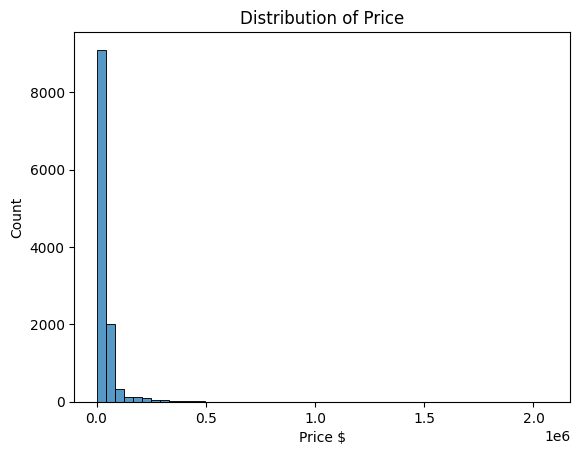

In [12]:
sns.histplot(cars.msrp, bins=50)
plt.title('Distribution of Price')  
plt.xlabel('Price $')
plt.ylabel('Count')

It's a long tail distribution. This kind of distribution is confusing for the model. Therefore, we need to get rid of this long tail and thus we apply logarithmic distribution. 

Text(0, 0.5, 'Count')

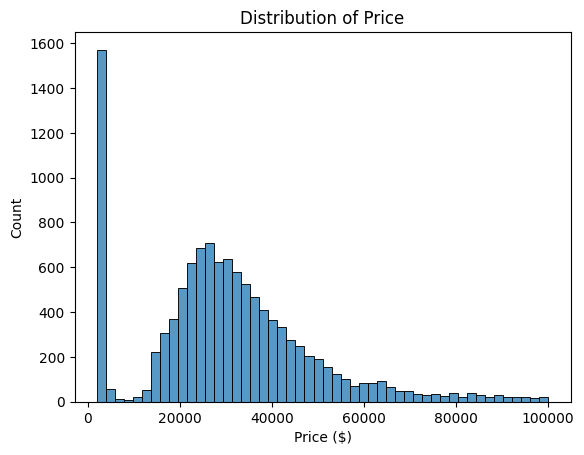

In [13]:
sns.histplot(cars.msrp[cars.msrp < 100000], bins=50)
plt.title('Distribution of Price')  
plt.xlabel('Price ($)')
plt.ylabel('Count')

In [14]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

# I will apply the log transformation to the msrp column to reduce skewness.
# Because logarithm of 0 is undefined, I will add 1 to the msrp values before applying the log transformation.

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
# A shortcut for the above code is to use log1p function from numpy.
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
price_logs = np.log1p(cars.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

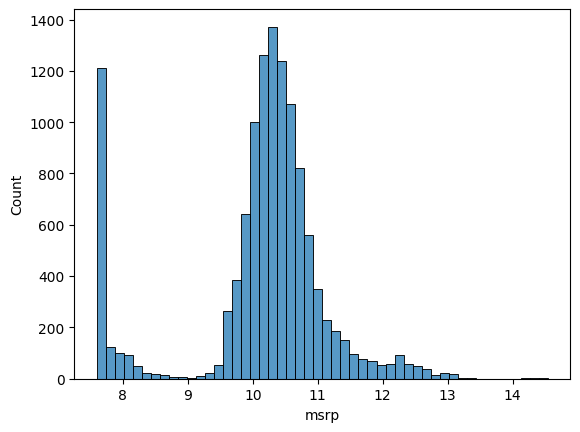

In [17]:
sns.histplot(price_logs, bins=50)

The distribution between 9 and 14 is a normal distribution and perfect for our model.

##### Missing Values

Let's see whether there are the missing values

In [18]:
cars.isnull().sum()


make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting the validation framework

Now, I need to split the data into training dateset, validation and testing datasets. 60% for training data, 20% for validation and 20% of data will be used for testing.

In [19]:
n_data = len(cars)
n_val = int(n_data * 0.2)  # 20% of the data for validation
n_test = int(n_data * 0.2)  # 20% of the data for testing
n_train = n_data - n_val - n_test  # Remaining data for training


In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
cars.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [22]:
cars_train = cars.iloc[:n_train]
cars_val = cars.iloc[n_train:n_train + n_val]
cars_test = cars.iloc[n_train + n_val:]

In [23]:
cars_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


The problem is that all BMW cars are in the validation dataset. So I need to shuffle the data to make sure that all cars are distributed in all datasets.

In [24]:
np.random.seed(42)  # To make it reproducible
idx = np.arange(n_data)
np.random.shuffle(idx)

In [25]:
cars_train = cars.iloc[idx[:n_train]]
cars_val = cars.iloc[idx[n_train:n_train + n_val]]
cars_test = cars.iloc[idx[n_train + n_val:]]

In [26]:
cars_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,mazda,truck,2003,regular_unleaded,207.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,extended_cab_pickup,17,14,586,19975
4861,kia,forte,2015,regular_unleaded,201.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,29,21,1720,20890
2334,dodge,caravan,2006,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,large,passenger_minivan,24,17,1851,18630
8651,acura,rsx,2005,regular_unleaded,160.0,4.0,automatic,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,31,22,204,21175


Now, the data is shuffled. Let's have a look at the length of datasets. 

In [27]:
len(cars_train), len(cars_val), len(cars_test)

(7150, 2382, 2382)

In [28]:
cars_train = cars_train.reset_index(drop=True)
cars_val = cars_val.reset_index(drop=True)
cars_test = cars_test.reset_index(drop=True)

In [29]:
cars_train.msrp

0       29695
1       30495
2       37650
3       16170
4        2000
        ...  
7145    19975
7146    20890
7147    18630
7148    21175
7149    29300
Name: msrp, Length: 7150, dtype: int64

In [30]:
y_train = np.log1p(cars_train.msrp.values)   # Let's make sure we apply log transformation to the target variable.
y_val = np.log1p(cars_val.msrp.values)
y_test = np.log1p(cars_test.msrp.values)


In [31]:
# Let's drop the msrp column from the feature set.
del cars_train['msrp']
del cars_val['msrp']
del cars_test['msrp']

In [32]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

## Training a linear regression model

Linear regression is a very simple approach for supervised learning and a useful tool for predicting a quantitative response. The least squares approach is most commonly used to fit this model. 

w : the bias term or intercept tells us the baseline, that is how much a car costs if we don't know anything about the car. 

In [33]:
def train_linear_regression(X, y):
    pass

In [34]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [35]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [ ]:
XTX = X.T.dot(X)  # This function computes the Gram matrix. X is a matrix of features and T is the transpose of X. The dot product computes the matrix multiplication.
XTX_inv = np.linalg.inv(XTX) # This computes the inverse of the Gram matrix.
w_full = XTX_inv.dot(X.T).dot(y) # This computes the weights for the linear regression model using the normal equation.

In [40]:
w0 = w_full[0]  # This is the intercept term.
w = w_full[1:]  # This is the coefficient for the rest of features.
w0, w

(np.float64(26.08419497680291), array([286.12285934,   3.93813107]))

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.sahpe[0]) # Create a column of ones for the intercept term.
    X = np.column_stack((ones, X))  # Stack the column of ones with the feature matrix.

    XTX = X.T.dot(X)  # Compute the Gram matrix.
    XTX_inv = np.linalg.inv(XTX)  # Compute the inverse of the Gram matrix.
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights using the normal equation.
    return w_full[0], w_full[1:]  # Return the intercept and the coefficients.

### Car price baseline model

In [43]:
cars_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object